In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %matplotlib notebook  # interactive, default is %matplotlib inline

In [3]:
import autograd.numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import re
import pickle

from autograd import grad
from pymanopt.manifolds import Oblique
from pymanopt.solvers import SteepestDescent
from helpers.oblique import *
from helpers.simulations import *

# Oblique Manifold

If a cost function is a strict-saddle one, I think Riemannian gradient descent (RGD) + noise can escape strict saddles. I'll try RGD with / without noise. 

Add noise:
$$ 
\mathbf x^+ = \text{R}_{\mathbf x}(\mathbf x + \mathbf n) 
$$

It seems noise is not necessary as in Prof.'s lecture on hybrid GD.

In [4]:
grad_sine = grad(np.sin)
grad_sine(np.pi)

-1.0

## Without constraint on $\mathbf H$

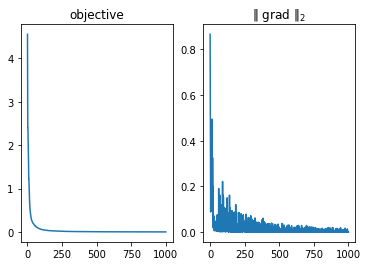

In [41]:
num_cls = 10
sample_per_cls = 5
N = sample_per_cls * num_cls
M = 2
solver = TrustRegions()
manifold = Product((Euclidean(M, num_cls), Euclidean(M, N), Euclidean(num_cls)))
Xopt, data = solve_prob(make_lr_weight_decay(0.1, 0, 0.01), solver, manifold)

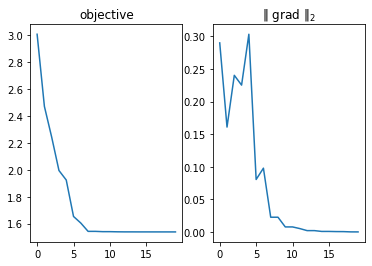

In [38]:
num_cls = 10
sample_per_cls = 5
N = sample_per_cls * num_cls
M = 2
solver = TrustRegions()
manifold = Product((Oblique(M, num_cls), Oblique(M, N), Euclidean(num_cls)))
Xopt, data = solve_prob(make_lr_weight_decay(0, 0, 0.01), solver, manifold)

In [39]:
W, H, b = Xopt

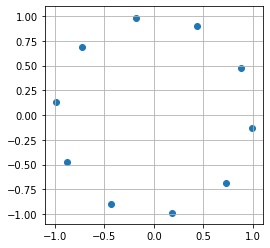

In [40]:
fig, axis = plt.subplots()
axis.scatter(W[0, :], W[1, :])
axis.grid(True)
axis.set_aspect("equal")
# plt.savefig(f"images/{num_cls}_cls_2d_WH_ob_weights.png")

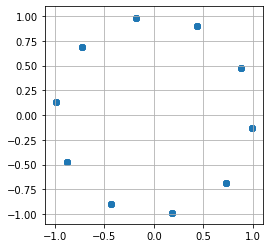

In [41]:
fig, axis = plt.subplots()
axis.scatter(H[0, :], H[1, :])
axis.grid(True)
axis.set_aspect("equal")
# plt.savefig(f"images/{num_cls}_cls_2d_WH_ob_features.png")

## Objective 1 of "Neural Collapse with CE Loss"

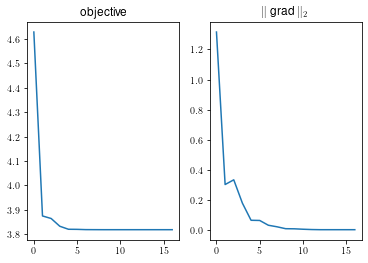

In [127]:
M, N = 10, 5
solver = SteepestDescent()
manifold = Oblique(M, N)
Xopt, data = solve_prob(lr_cost, solver, manifold)
# Xopt

In [128]:
check_etf(Xopt)

ETF Tests passed!


## Objective 2

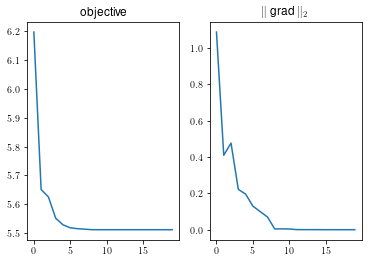

In [129]:
M, N = 10, 6
solver = SteepestDescent()
manifold = Oblique(M, N)
Xopt, data = solve_prob(lr_cost, solver, manifold)
# Xopt

In [130]:
check_etf(Xopt, verbose=True)

[1. 1. 1. 1. 1. 1.]
[[ 1.  -0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.2  1.  -0.2 -0.2 -0.2 -0.2]
 [-0.2 -0.2  1.  -0.2 -0.2 -0.2]
 [-0.2 -0.2 -0.2  1.  -0.2 -0.2]
 [-0.2 -0.2 -0.2 -0.2  1.  -0.2]
 [-0.2 -0.2 -0.2 -0.2 -0.2  1. ]]
ETF Tests passed!


## Weight Decay

In [131]:
num_cls = 10
N = 3
np.kron(np.arange(num_cls), np.ones((N,)))

array([0., 0., 0., 1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 4., 5., 5., 5., 6., 6., 6., 7., 7.,
       7., 8., 8., 8., 9., 9., 9.])

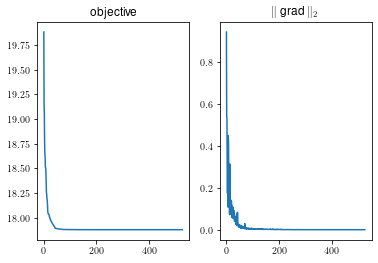

In [132]:
num_cls = 10
sample_per_cls = 10
N = sample_per_cls * num_cls
M = 15
solver = SteepestDescent()
manifold = Product((Oblique(M, num_cls), Oblique(M, N), Euclidean(num_cls)))
Xopt, data = solve_prob(make_lr_weight_decay(), solver, manifold)
# Xopt

In [133]:
W, H, b = Xopt

In [134]:
check_etf(W, verbose=False, atol=1e-4)

ETF Tests passed!


In [135]:
b

array([ 1.1988e-06, -1.6402e-07,  1.8684e-07, -1.0201e-06,  8.1800e-08, -6.6878e-07, -1.1596e-06,
       -1.1610e-07,  1.0717e-06,  5.8946e-07])

In [136]:
np.set_printoptions(precision=4, linewidth=100)

In [137]:
H

array([[-0.1922, -0.1922, -0.1922, ..., -0.0316, -0.0316, -0.0316],
       [ 0.2971,  0.2971,  0.2971, ...,  0.1424,  0.1424,  0.1424],
       [-0.1996, -0.1996, -0.1996, ...,  0.4314,  0.4314,  0.4314],
       ...,
       [-0.0078, -0.0078, -0.0078, ...,  0.1859,  0.1859,  0.1859],
       [-0.6388, -0.6388, -0.6388, ..., -0.2982, -0.2982, -0.2982],
       [-0.2023, -0.2023, -0.2023, ..., -0.2554, -0.2554, -0.2554]])

In [138]:
H[:, :sample_per_cls]

array([[-0.1922, -0.1922, -0.1922, -0.1922, -0.1922, -0.1922, -0.1922, -0.1922, -0.1922, -0.1922],
       [ 0.2971,  0.2971,  0.2971,  0.2971,  0.2971,  0.2971,  0.2971,  0.2971,  0.2971,  0.2971],
       [-0.1996, -0.1996, -0.1996, -0.1996, -0.1996, -0.1996, -0.1996, -0.1996, -0.1996, -0.1996],
       [-0.2551, -0.2551, -0.2551, -0.2551, -0.2551, -0.2551, -0.2551, -0.2551, -0.2551, -0.2551],
       [-0.2085, -0.2085, -0.2085, -0.2085, -0.2085, -0.2085, -0.2085, -0.2085, -0.2085, -0.2085],
       [-0.191 , -0.191 , -0.191 , -0.191 , -0.191 , -0.191 , -0.191 , -0.191 , -0.191 , -0.191 ],
       [ 0.1884,  0.1884,  0.1884,  0.1884,  0.1884,  0.1884,  0.1884,  0.1884,  0.1884,  0.1884],
       [-0.0587, -0.0587, -0.0587, -0.0587, -0.0587, -0.0587, -0.0587, -0.0587, -0.0587, -0.0587],
       [ 0.1776,  0.1776,  0.1776,  0.1776,  0.1776,  0.1776,  0.1776,  0.1776,  0.1776,  0.1776],
       [-0.2616, -0.2616, -0.2616, -0.2616, -0.2616, -0.2616, -0.2616, -0.2616, -0.2616, -0.2616],
       [-0

### Observations
1. If I run the problem solving cell multiple times the solution will change due to orthogonal transform, but **Thm. 3.1**'s results hold.
1. $\mathbf W$, $\mathbf H$ must both be oblique manifold. My understanding is since they are dual, they must be in the same structure.
1. $\mathbf b$ vanishes just as expected.

In [139]:
check_duality(W, H)

ETF Tests passed!
All tests passed!


## $\text{MCR}^2$

In [140]:
# num_cls = 8
# sample_per_cls = 10
# N = sample_per_cls * num_cls
# M = 15
# solver = SteepestDescent(maxiter=30000)  # very slow
# manifold = Oblique(M, N)
# Xopt, data = solve_prob(make_mcr2_loss(num_cls), solver, manifold)
# # Xopt

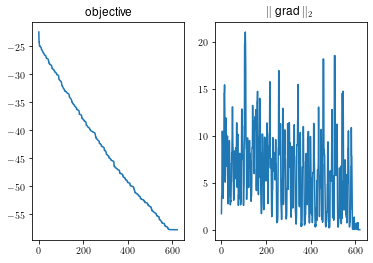

In [141]:
num_cls = 8
sample_per_cls = 10
N = sample_per_cls * num_cls
M = 15
solver = TrustRegions()
manifold = Oblique(M, N)
Xopt, data = solve_prob(make_mcr2_loss(num_cls), solver, manifold)
# Xopt

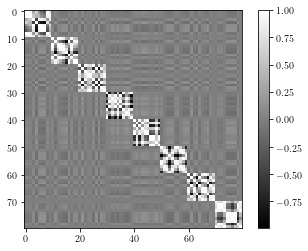

In [142]:
Xopt = Xopt * np.sign(Xopt[0, :])
inner = Xopt.T @ Xopt
fig, axis = plt.subplots()
handle = axis.imshow(inner, cmap="gray")
plt.colorbar(handle)

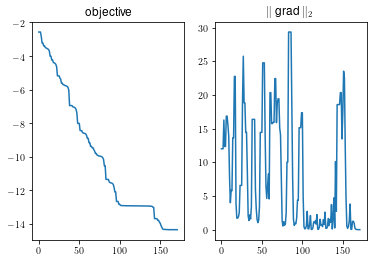

In [143]:
num_cls = 3
sample_per_cls = 5
N = sample_per_cls * num_cls
M = 5
solver = TrustRegions()
manifold = Oblique(M, N)
Xopt, data = solve_prob(make_mcr2_loss(num_cls), solver, manifold)
# Xopt

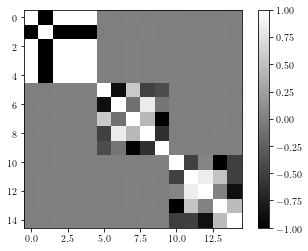

In [144]:
inner = Xopt.T @ Xopt
fig, axis = plt.subplots()
handle = axis.imshow(inner, cmap="gray")
plt.colorbar(handle)

test 1/10


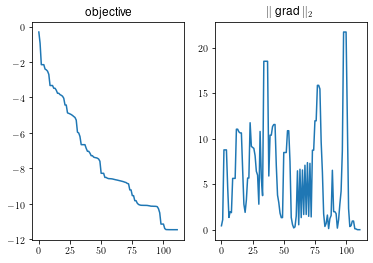

test 2/10


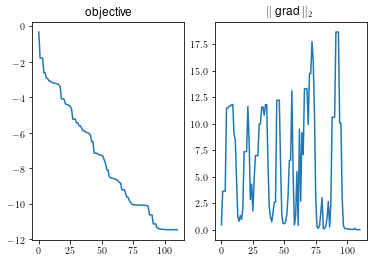

test 3/10


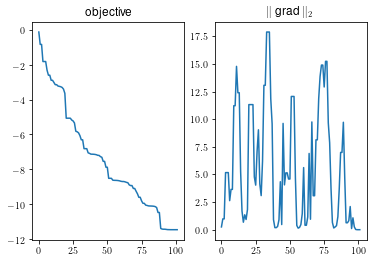

test 4/10


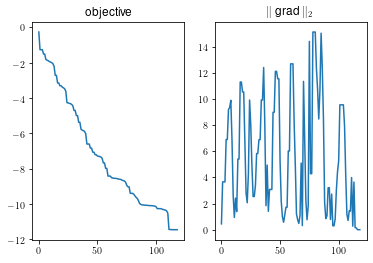

test 5/10


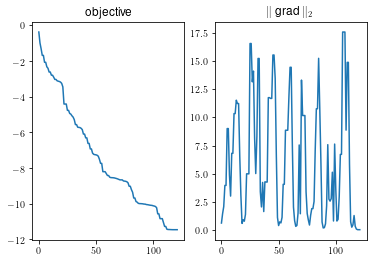

test 6/10


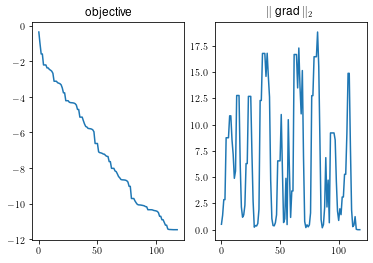

test 7/10


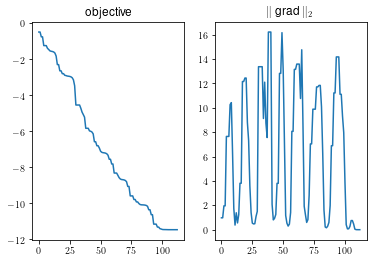

test 8/10


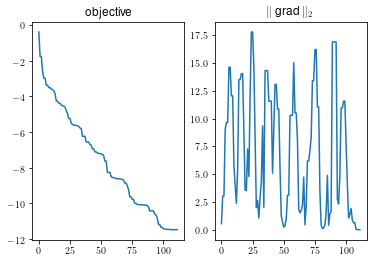

test 9/10


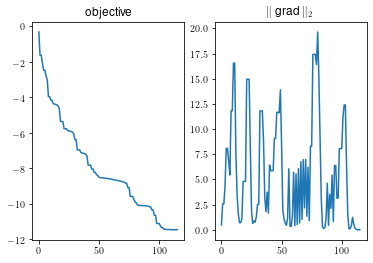

test 10/10


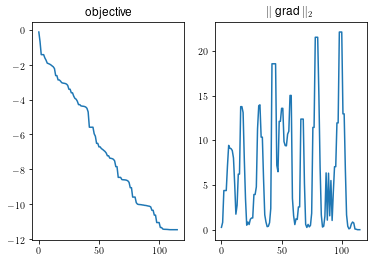

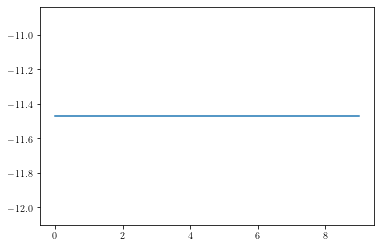

In [145]:
fvals = []
num_trials = 10
for i in range(num_trials):
    print(f"test {i + 1}/{num_trials}")
    num_cls = 3
    sample_per_cls = 10
    N = sample_per_cls * num_cls
    M = 4
    solver = TrustRegions()
    manifold = Oblique(M, N)
    Xopt, data = solve_prob(make_mcr2_loss(num_cls), solver, manifold)
    fvals.append(data[-1, 0])

fvals = numpy.array(fvals)
plt.plot(fvals)

In [146]:
fvals.mean(), numpy.std(fvals)

(-11.469719999999999, 1.7763568394002505e-15)

### Observations
1. The optimal solution is orthogonal subspaces with orthongonal transform (sign flip, permutation) as proved in the paper.
1. I think this is a strict-saddle function since $\sigma(f^*)$ is very small.
1. Number of classes should be $\le$ feature dimension, which aligns very well with NC paper.
1. Larger number of classes and feature dimension can be hard to converge. RGD is very slow. RTR is much faster, but for high-dimension case orthogonality can be seen but not as good as expected.
1. To see a 3D plot for 3 classes and feature dimension equal to 2 or 3 by running "oblique.py".

# ETF for K $\gg$ d

## 8 classes, 2d features contrained on manifold

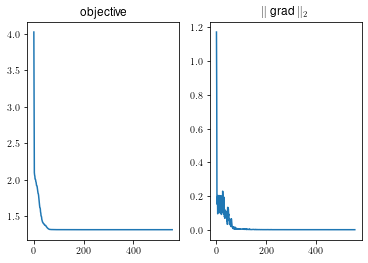

In [147]:
M = 2
K = 8
samples_per_cls = 5
solver = SteepestDescent()
manifold = Product((Oblique(M, K), Oblique(M, samples_per_cls * K), Euclidean(K)))
loss_fn = make_lr_weight_decay(0, 0)
Xopt, data = solve_prob(loss_fn, solver, manifold)

In [148]:
W, H, b = Xopt

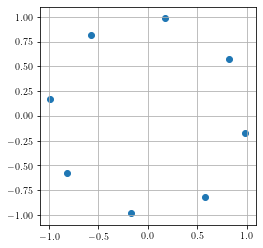

In [149]:
fig, axis = plt.subplots()
axis.scatter(W[0, :], W[1, :])
axis.grid(True)
axis.set_aspect("equal")
plt.savefig("images/8_cls_2d.png")

In [150]:
data[-1]

array([1.3154e+00, 7.6513e-07])

In [151]:
# K = 5
# SETF = numpy.eye(5) - 1 / K * numpy.ones((K, K))
# SETF @ SETF.T

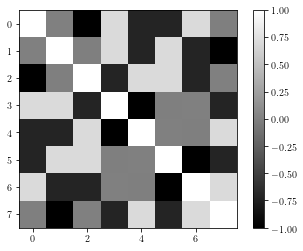

In [152]:
inner = W.T @ W
plt.imshow(inner, cmap="gray")
plt.colorbar()

## $\ge$ 6 classes will fail in weight decay verision:  points are on two circles

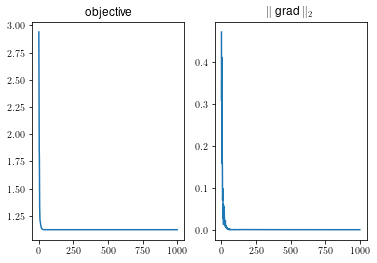

In [153]:
M = 2
K = 8
samples_per_cls = 5
solver = SteepestDescent()
manifold = Product((Euclidean(M, K), Euclidean(M, samples_per_cls * K), Euclidean(K)))
loss_fn = make_lr_weight_decay(0.01, 0.01, 0.01)
Xopt, data = solve_prob(loss_fn, solver, manifold)

In [154]:
W, H, b = Xopt

In [155]:
W

array([[-0.4229, -0.4167, -2.438 ,  0.4167,  2.438 , -2.9548,  2.9548,  0.4229],
       [ 3.1434,  0.5399, -1.9183, -0.5399,  1.9183,  1.1485, -1.1485, -3.1434]])

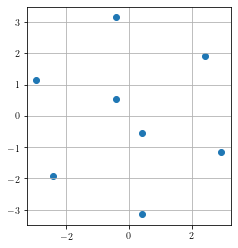

In [156]:
fig, axis = plt.subplots()
axis.scatter(W[0, :], W[1, :])
axis.grid(True)
axis.set_aspect("equal")
plt.savefig("images/8cls_2d_decay.png")

In [157]:
loss_primary = make_lr_weight_decay(0, 0)
loss_primary((W, H, b))

1.0762453641060254

## constrained on manifold: features are parallel to weights

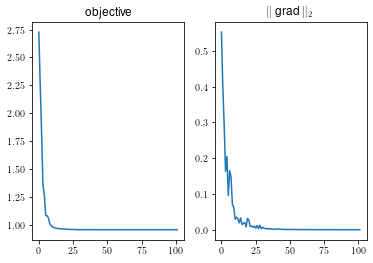

In [158]:
M = 3
K = 6
samples_per_cls = 5
solver = SteepestDescent()
manifold = Product((Oblique(M, K), Oblique(M, samples_per_cls * K), Euclidean(K)))
loss_fn = make_lr_weight_decay(0, 0, 0.01)
Xopt, data = solve_prob(loss_fn, solver, manifold)

In [159]:
numpy.set_printoptions(precision=4, linewidth=100)

In [160]:
W, H, b = Xopt.copy()

In [161]:
# W

In [162]:
# H

In [163]:
numpy.linalg.norm(W, axis=0)

array([1., 1., 1., 1., 1., 1.])

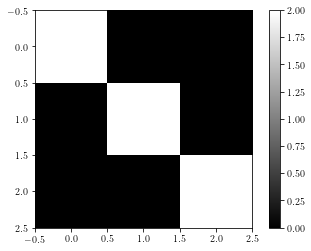

In [164]:
plt.imshow(W @ W.T, cmap="gray")
plt.colorbar()

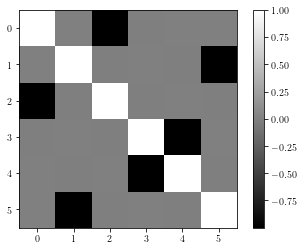

In [165]:
plt.imshow(W.T @ W, cmap="gray")
plt.colorbar()

## Basic Contrastive Loss
From [word2vec](https://arxiv.org/abs/1301.3781) with negative sampling.
$$\min\sum\text{log}(1 + \text{exp}(\mathbf u^T \mathbf u_{sim} - \mathbf u^T \mathbf u_{disim}))$$

In [166]:
# numpy.sort((W.T @ W).ravel())

## 3D, 6 classes ETF is not a minimizer
This is the real ETF in [On the Existence of ETF](https://www.cs.utexas.edu/~inderjit/public_papers/equiangular.pdf), p624 ($\varphi = \frac{1 + \sqrt{5}}{2}$ example)

In [167]:
phi = (1 + numpy.sqrt(5)) / 2
S = 1 / numpy.sqrt(1 + phi ** 2) * numpy.array([[0, 0, 1, 1, phi, -phi],
                                               [1, 1, phi, -phi, 0, 0],
                                               [phi, -phi, 0, 0, 1, 1]])

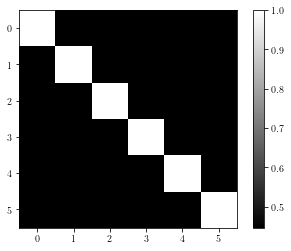

In [168]:
plt.imshow(numpy.abs(S.T @ S), cmap="gray")
plt.colorbar()

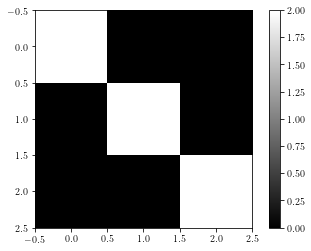

In [169]:
plt.imshow(S @ S.T, cmap="gray")
plt.colorbar()

In [170]:
H_S = numpy.kron(S, numpy.ones((samples_per_cls,)))
loss_func = make_lr_weight_decay(0, 0, 0.01)
loss_func((S, H_S, numpy.zeros((K,))))

1.0424091471490429

In [171]:
data[-1]  # loss, ||grad||

array([9.5814e-01, 9.4214e-07])

In [172]:
# this is a simple demo showing how to compute directional Hessian using autograd
from scipy.optimize import check_grad
PD_N = 5
A = numpy.random.randn(PD_N, PD_N + 1) 
A = A @ A.T

def foo(x):
    return np.linalg.norm(x) ** 2 + x @ (A @ x)

hessian = lambda x: 2 * A + 2 * numpy.eye(PD_N)

x0 = numpy.random.randn(PD_N)
grad_foo = grad(foo)
check_grad(foo, grad_foo, x0)

1.1897096477437171e-06

In [173]:
num_trials = 30
for test_itr in range(num_trials):
    direction = numpy.random.randn(PD_N)
    direction /= numpy.linalg.norm(direction)
    
    scalar = lambda x: grad_foo(x) @ direction
    grad_scalar = grad(scalar)
    x0 = numpy.random.randn(PD_N)
    assert numpy.allclose(hessian(x0) @ direction, grad_scalar(x0))
    check_grad(scalar, lambda x :hessian(x) @ direction, x0)

## Observations
1. Interactive 3d features can be viewed by running "oblique.py"
1. Weights form not an ETF but I guess a "uniform measure" on sphere as pointed out in [Neural Collapse with Cross-Entropy Loss](https://arxiv.org/abs/2012.08465)
1. Features are just scaled verision of weights
1. Weight decay version cannot guarantee "uniform measure", but with manifold contraints it does better

# Investigating minimum angle
This section contains computationally intensive simulations. I suggest running them on Google Colab. Please make a copy of my [colab notebook](https://colab.research.google.com/notebook#fileId=1O48ysoESkNvW2-Rzb8Gibwm0_etzqfDW) and feel free to play around with it.

current: K = 2, M = 1


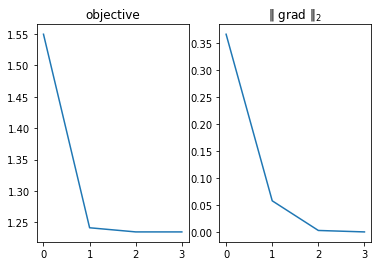

current: K = 3, M = 1


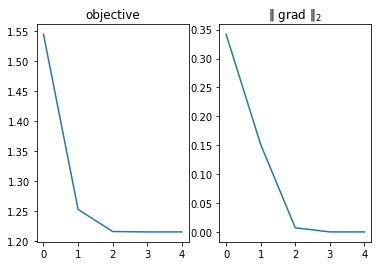

current: K = 3, M = 2


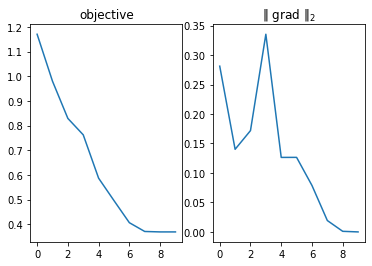

current: K = 4, M = 1


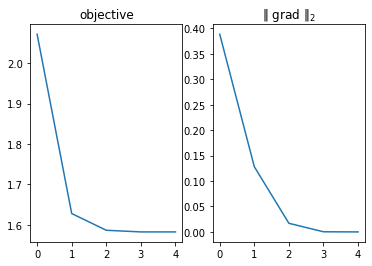

current: K = 4, M = 2


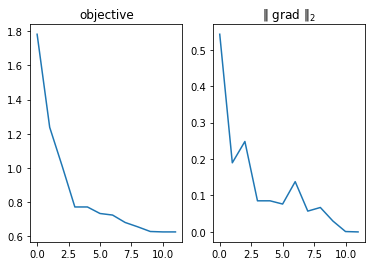

current: K = 4, M = 3


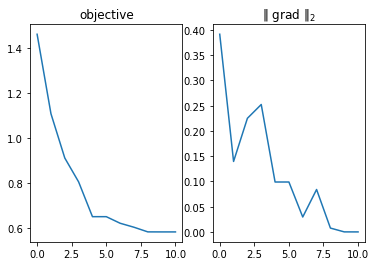

current: K = 5, M = 1


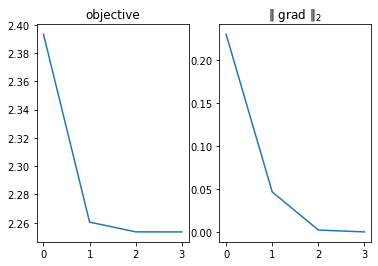

current: K = 5, M = 2


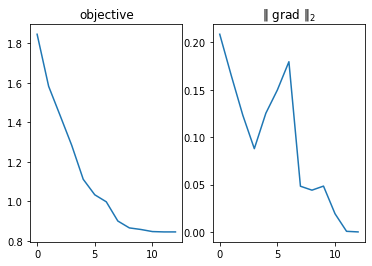

current: K = 5, M = 3


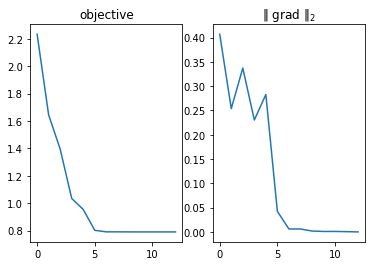

current: K = 5, M = 4


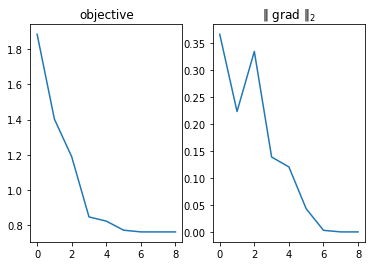

In [12]:
out_dict = simulate_maxmin_angle(5)

Fix K, change M:


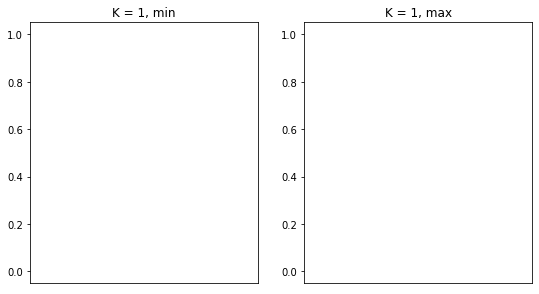

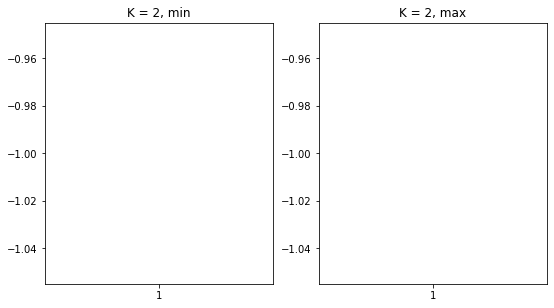

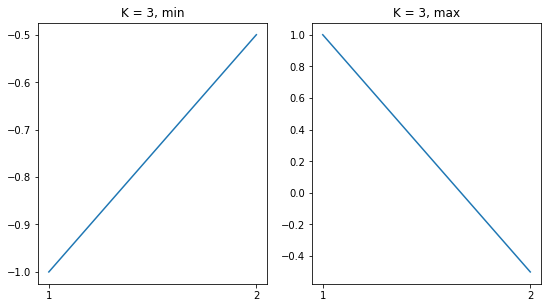

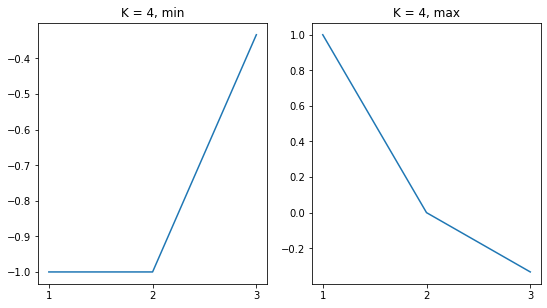

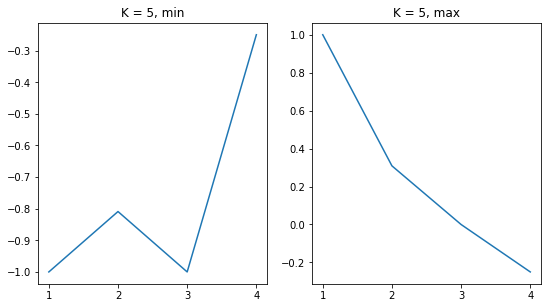

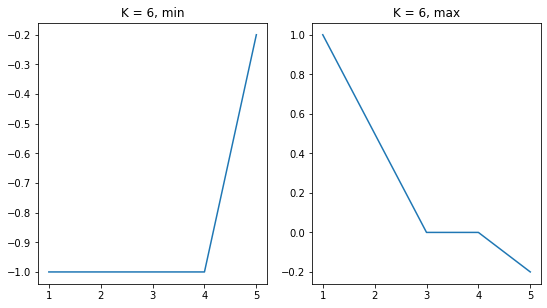

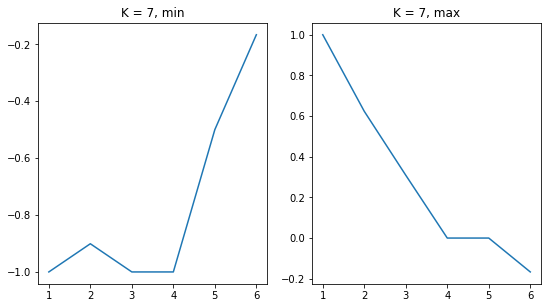

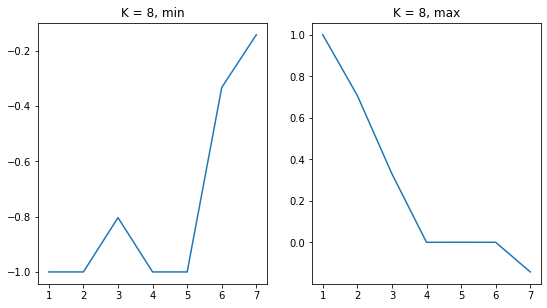

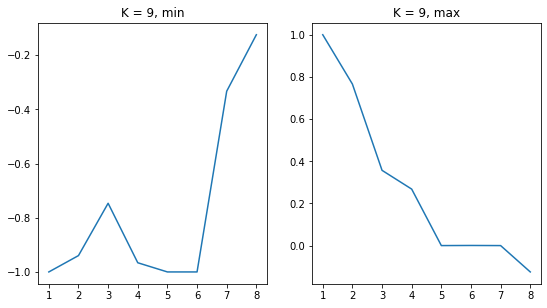

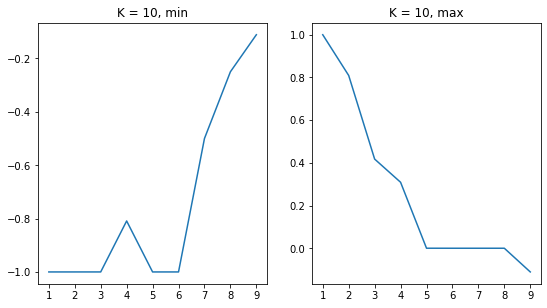

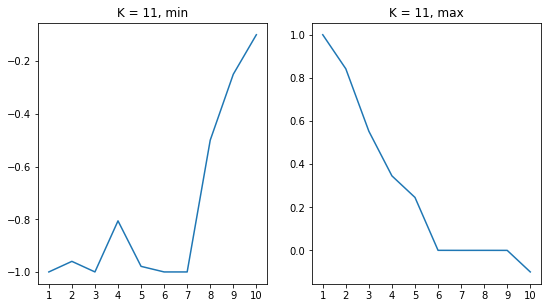

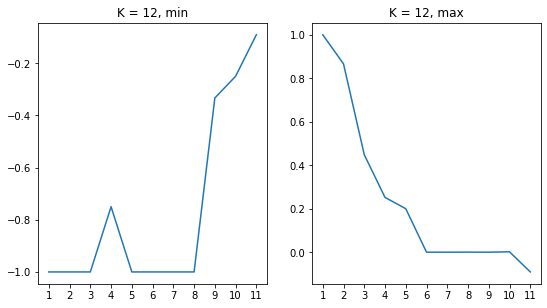

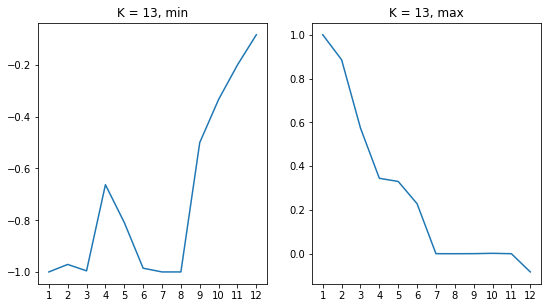

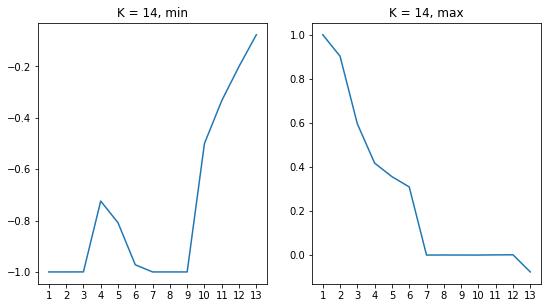

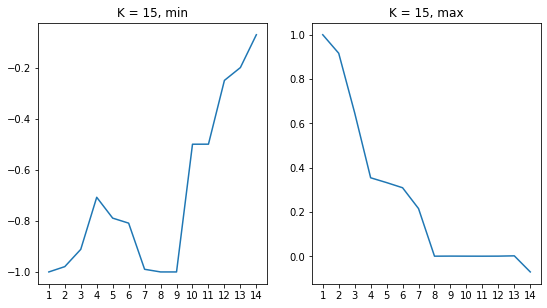

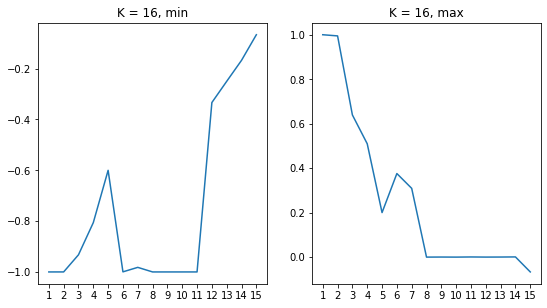

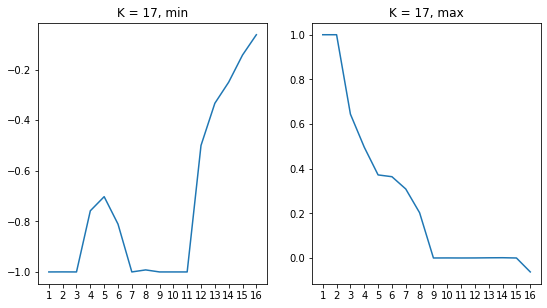

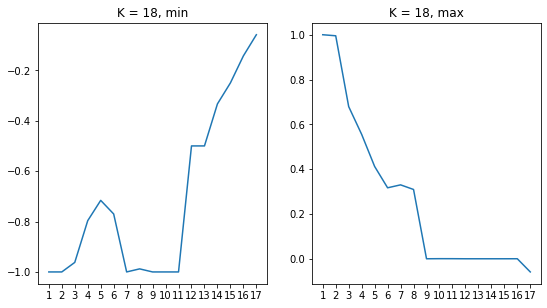

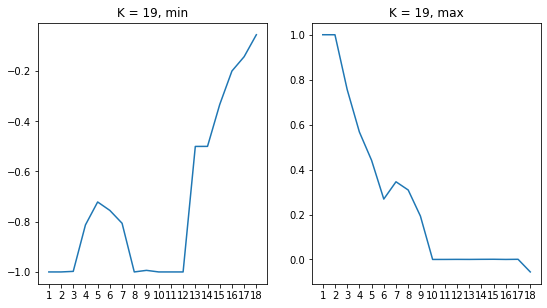

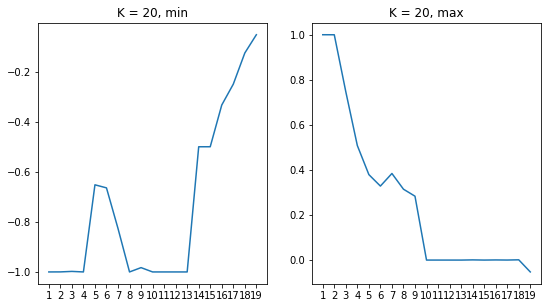

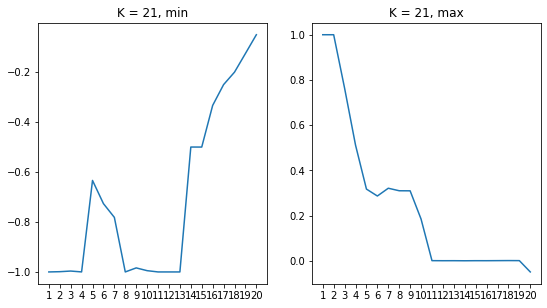

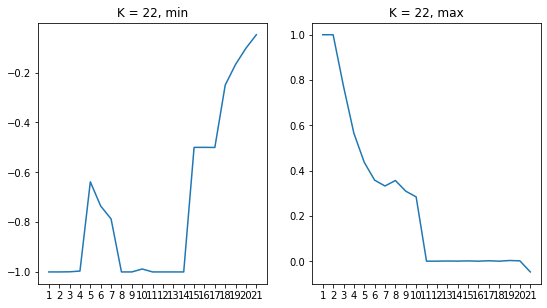

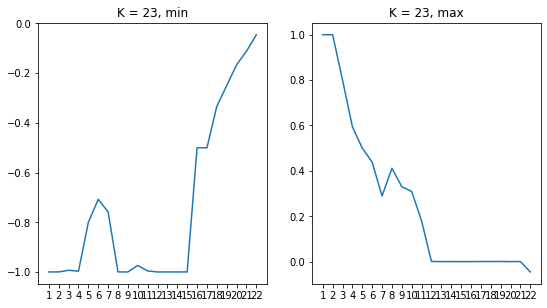

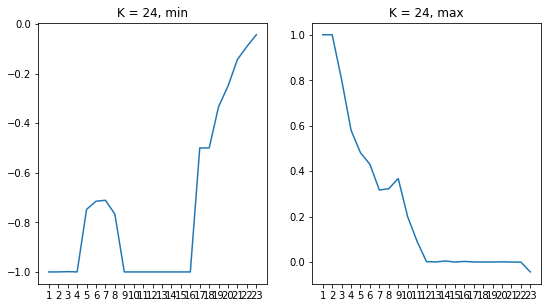

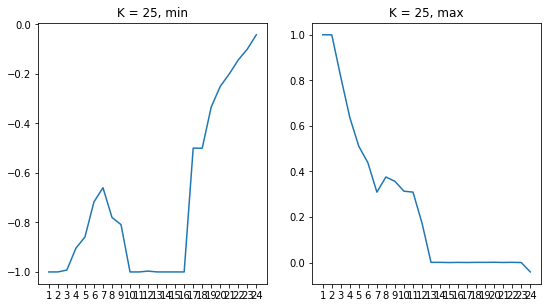

----------------------------------------------------------------------------------------------------


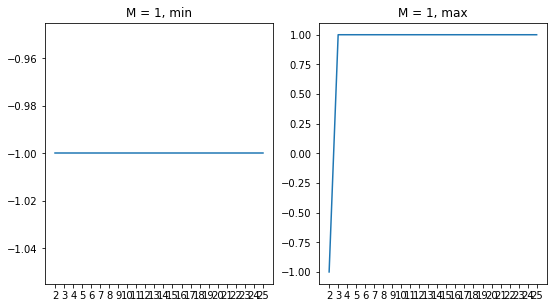

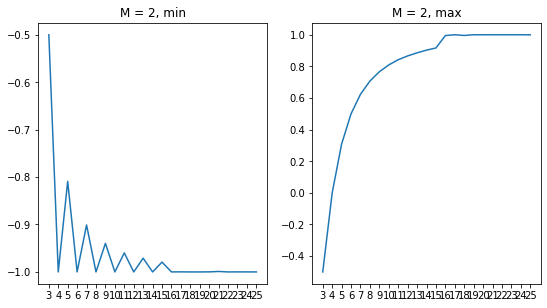

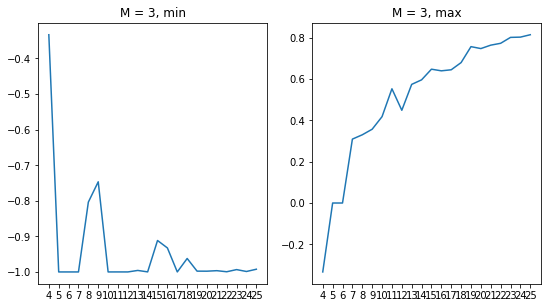

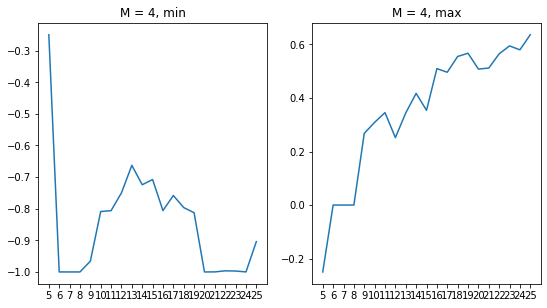

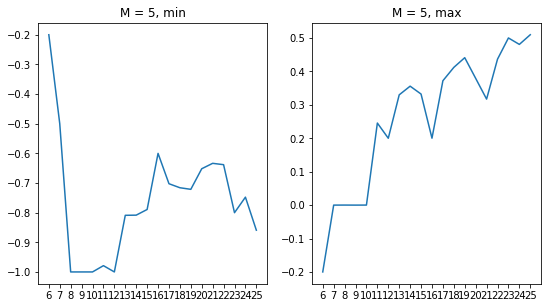

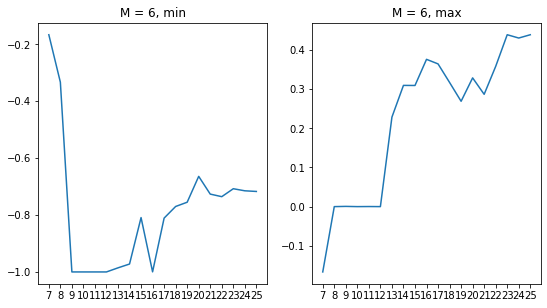

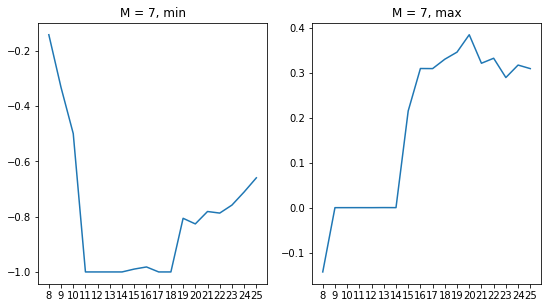

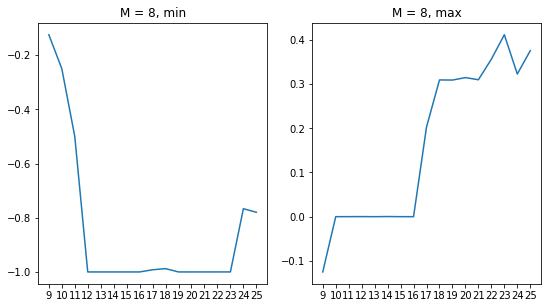

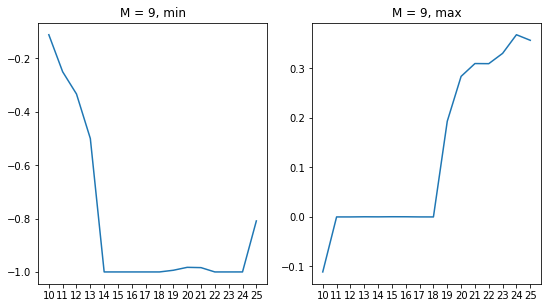

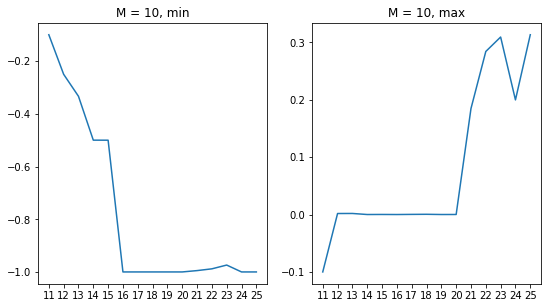

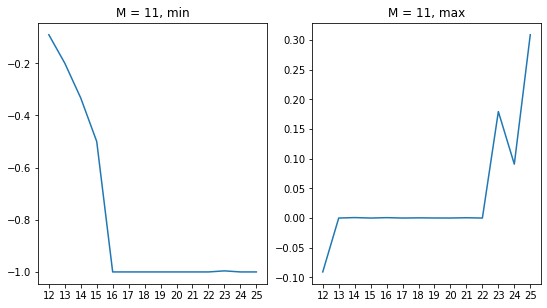

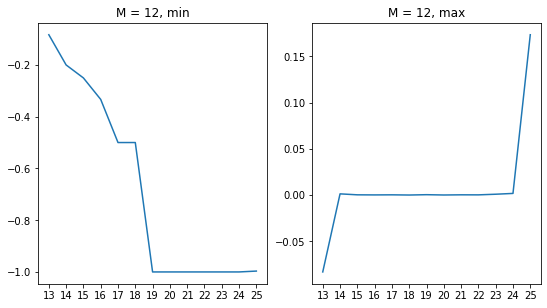

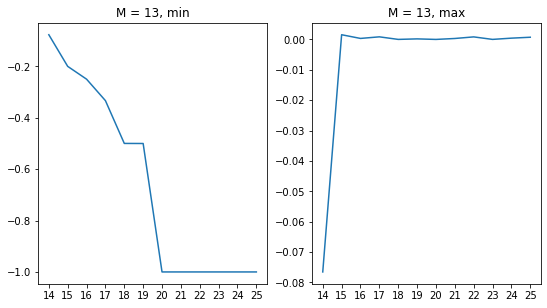

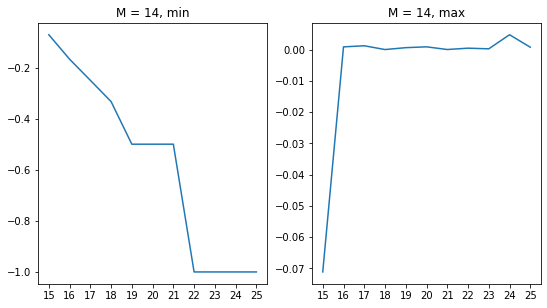

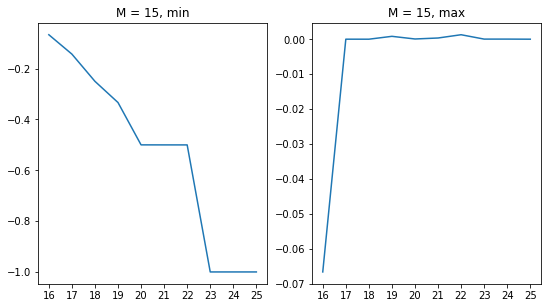

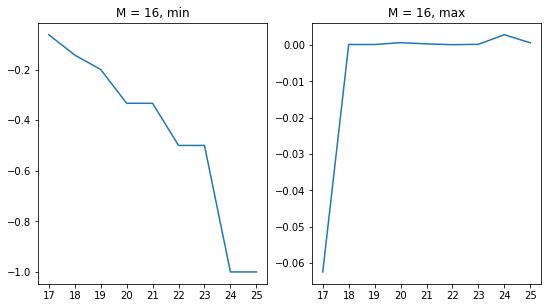

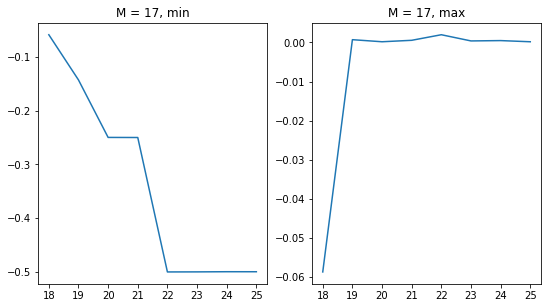

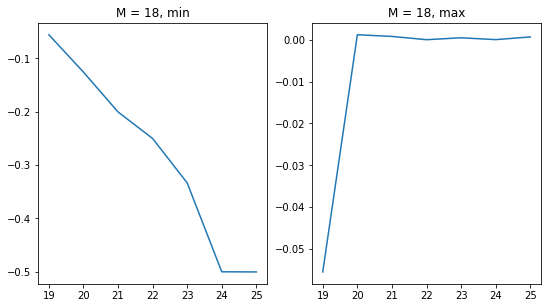

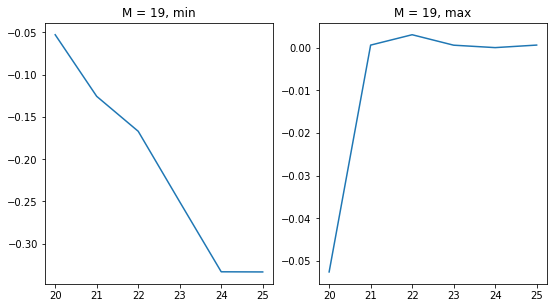

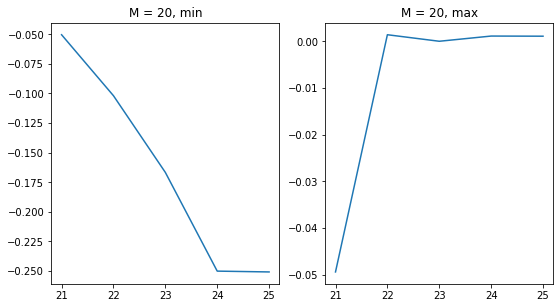

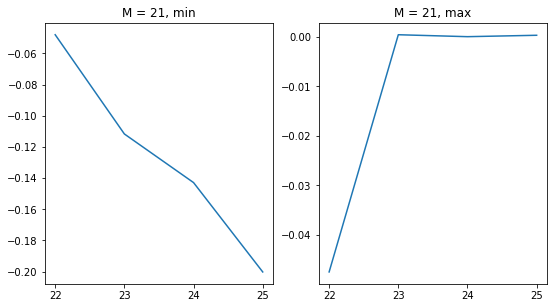

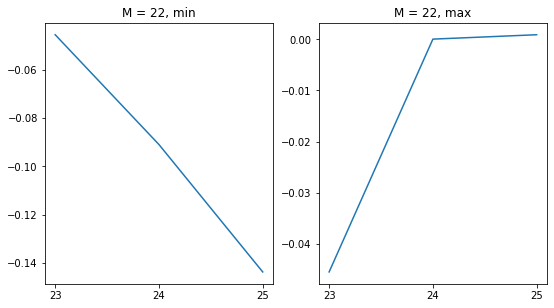

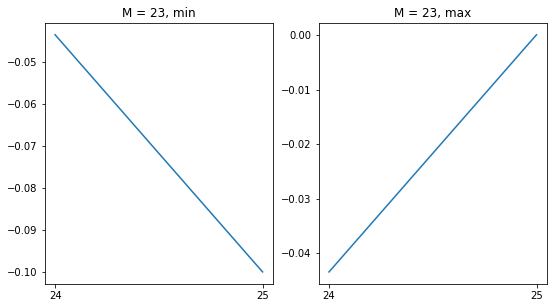

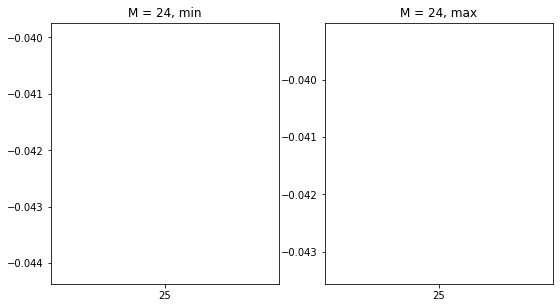

In [11]:
plot_general_simulation("parameters/inner_prods_RTR.pkl")

In [5]:
M_list = [2]
fix_M_change_K(M_list)

current: 2 out of [2]
fetching stored data...


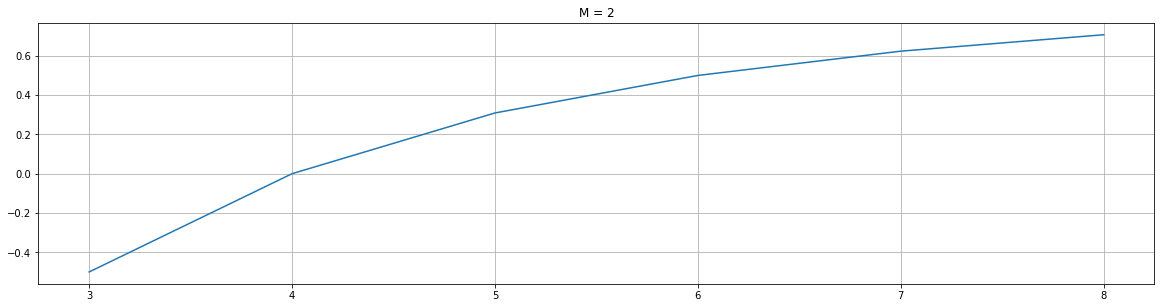

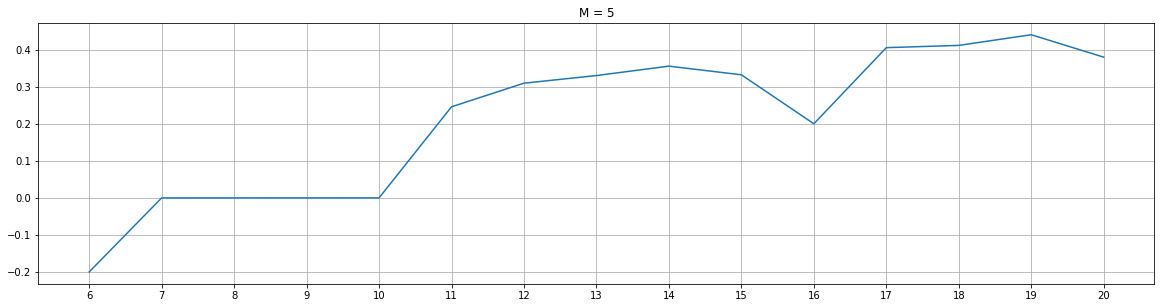

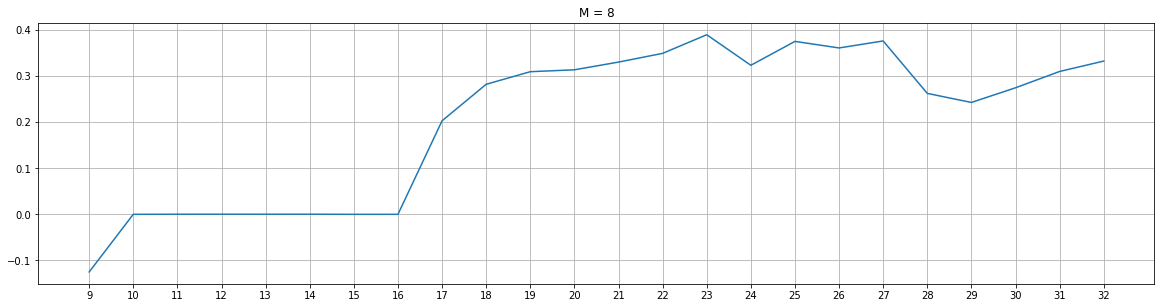

In [6]:
M_list = [2, 5, 8]
plot_fix_M(M_list)

In [7]:
K_list = [5]
fix_K_change_M(K_list)

current: 5 out of [5]
fetching stored data...


K = 10 hasn't been simulated.


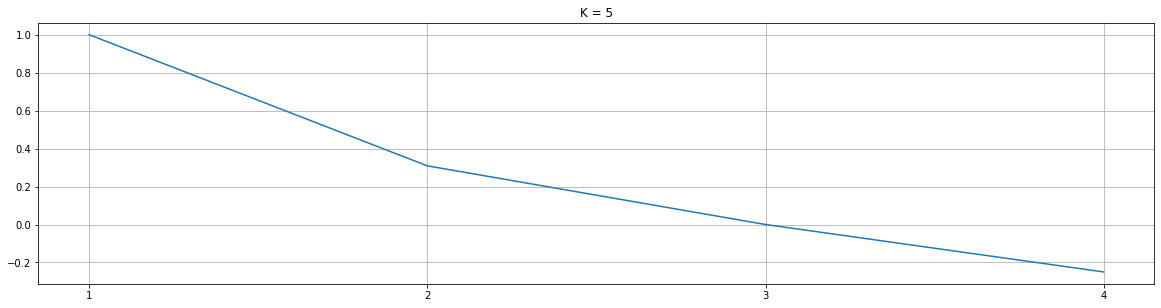

In [8]:
K_list = [5, 10]
plot_fix_K(K_list)

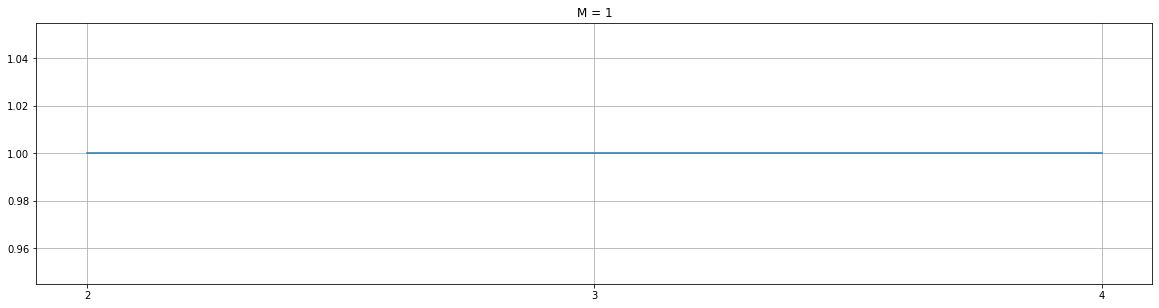

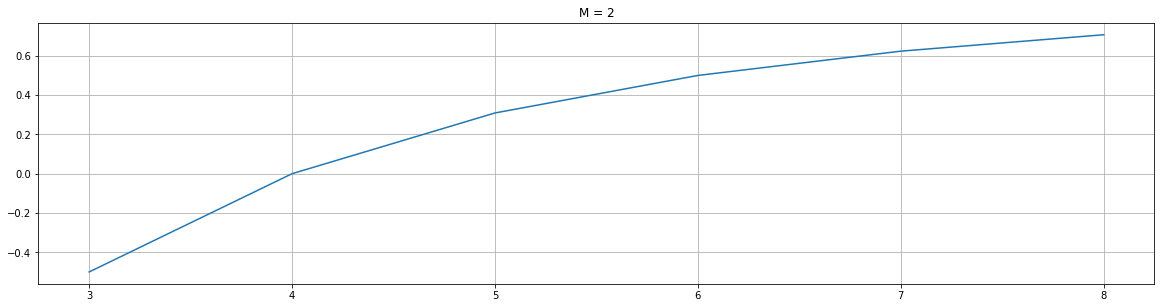

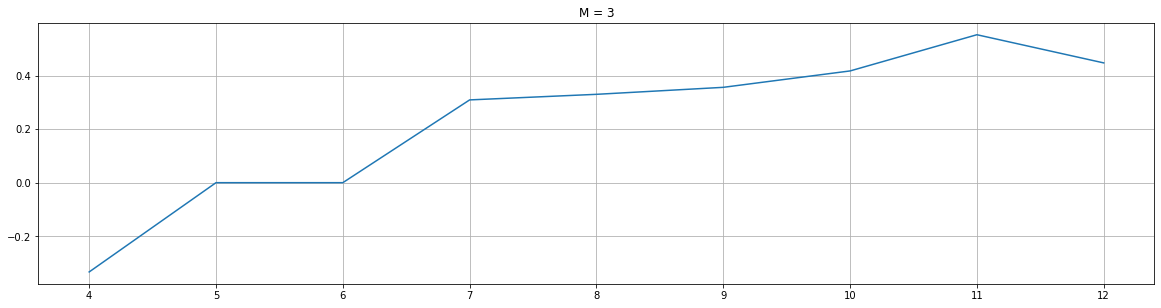

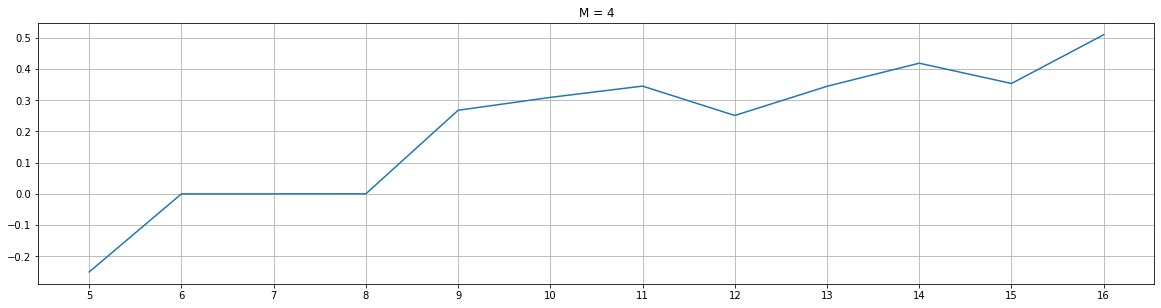

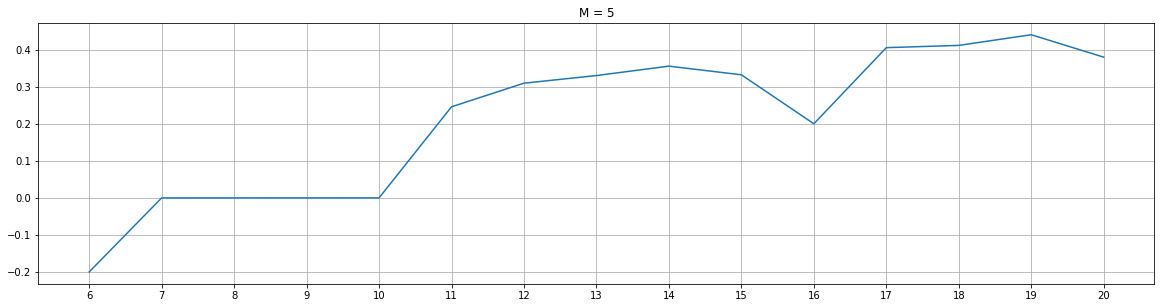

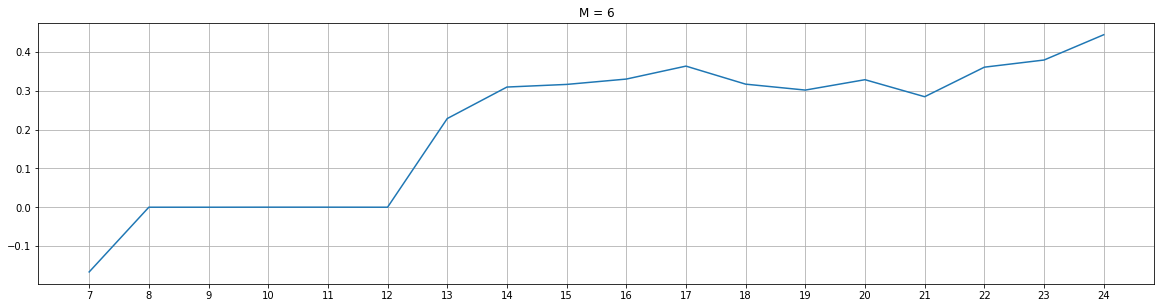

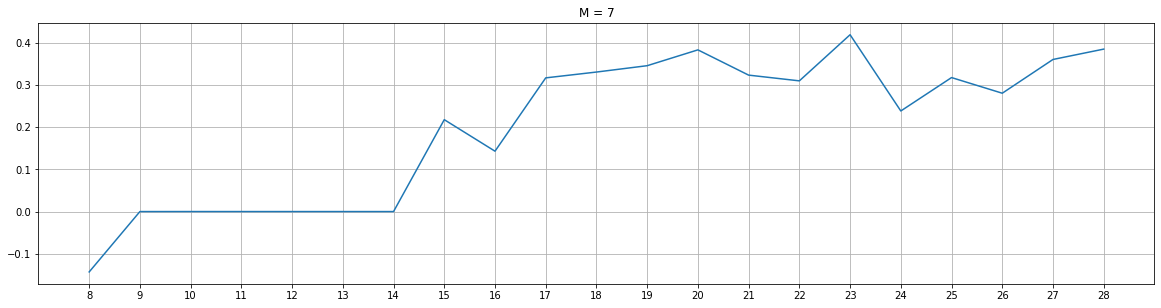

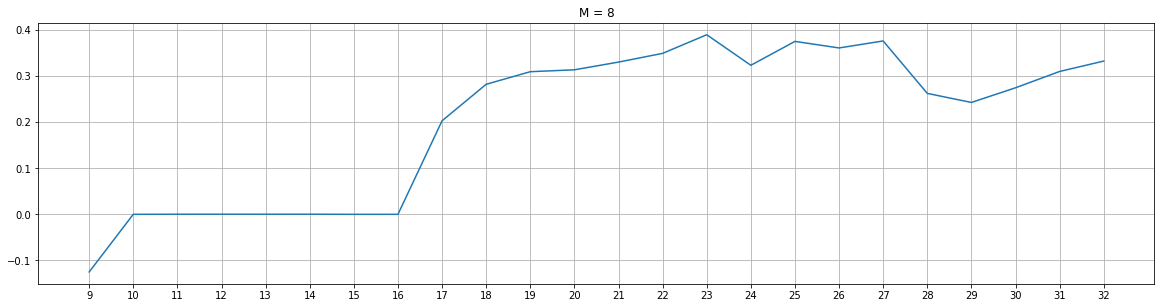

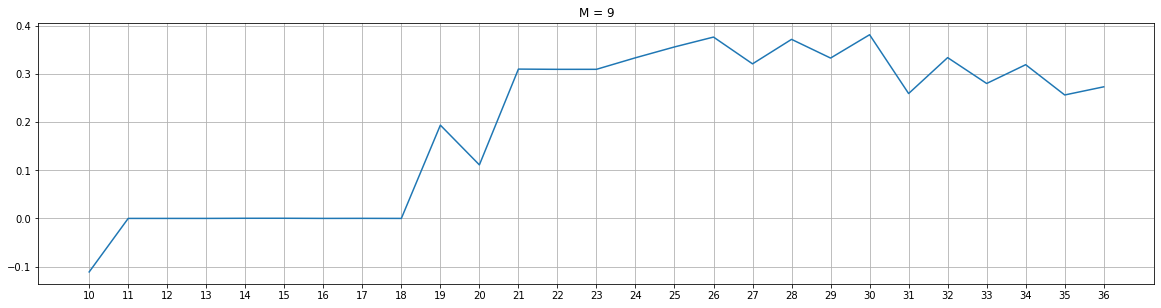

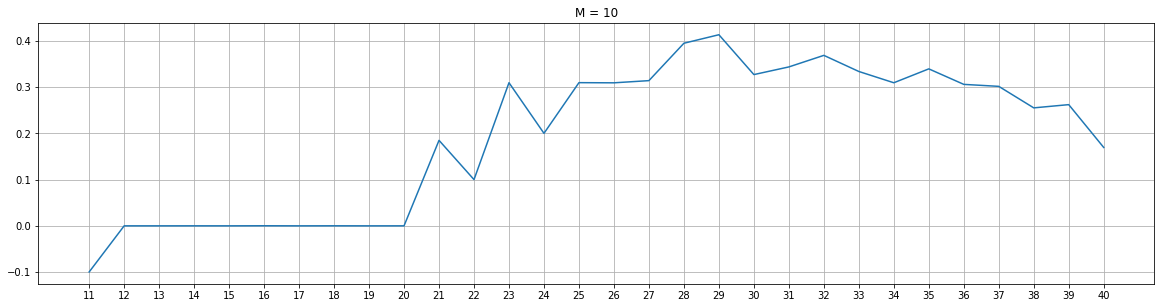

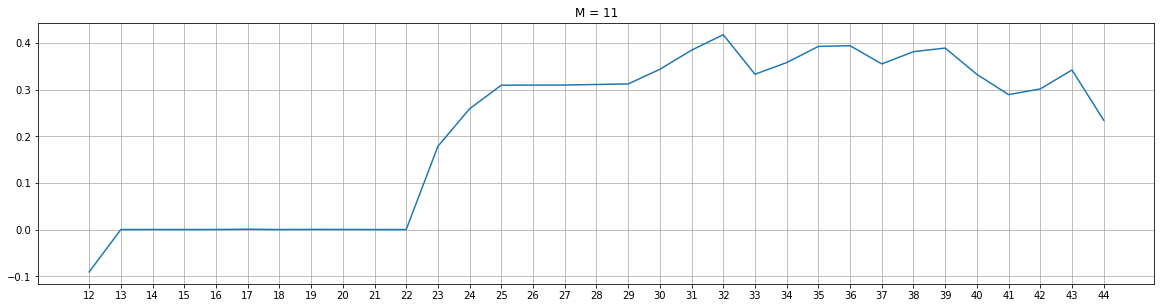

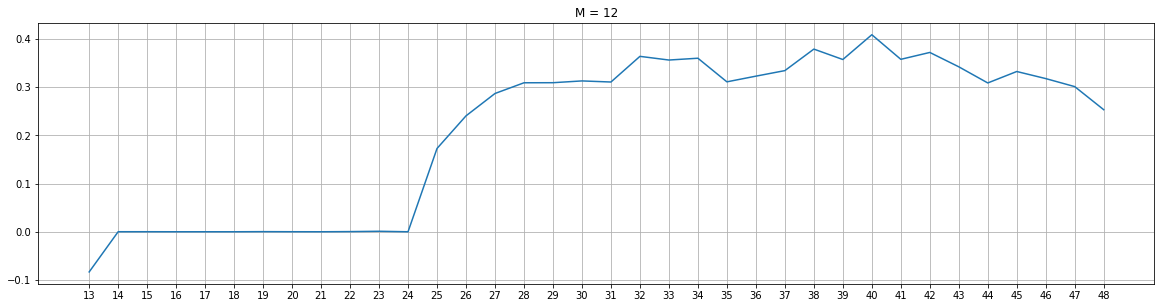

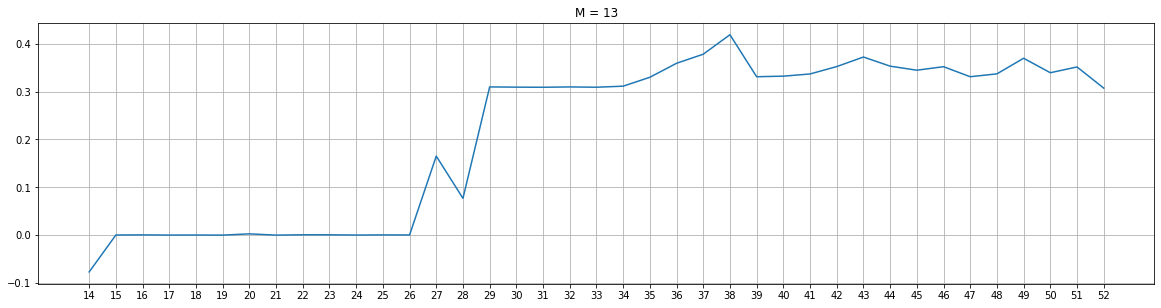

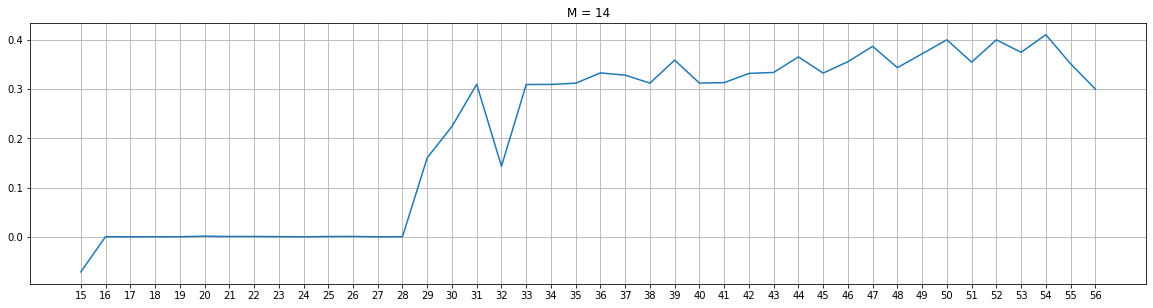

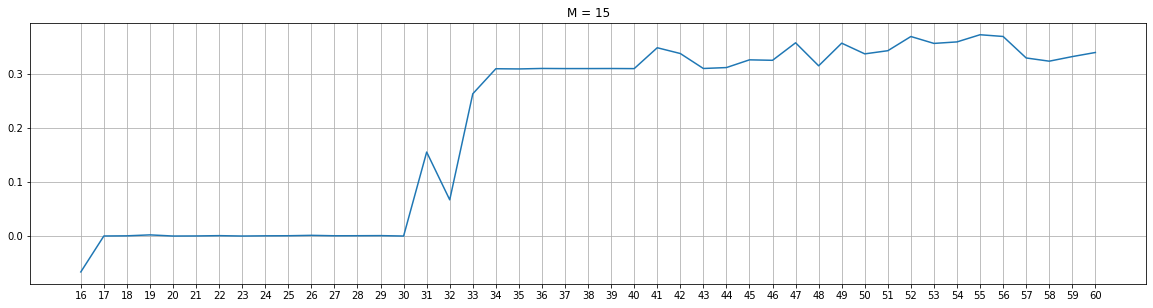

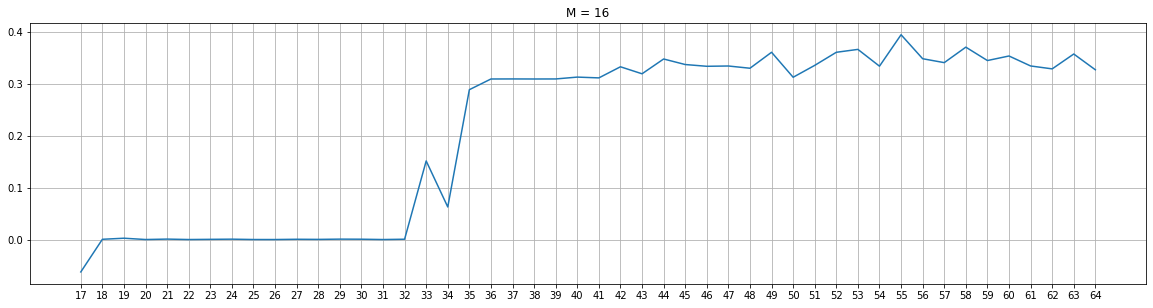

In [9]:
M_list = numpy.arange(1, 17)
plot_fix_M(M_list, make_super_fig=True)